In [1]:
# depedencies
import getpass
from topolib.subsetDat import subsetBBox;
from topolib import IceSat2Data
import glob
import rasterio
from topolib import gda_lib

In [2]:
# inputs
# if want to explcitly define bounding box, raster = None
datafolder = '/Users/hpm/HP_DRIVE/ICESat2-hackweek/topohack/data/'
datafolderOut = '/Users/hpm/HP_DRIVE/ICESat2-hackweek/topohack/data/out/'

raster = '/Users/hpm/HP_DRIVE/ICESat2-hackweek/topohack/data/USCOGM20160604f1a1_bareDEM_3p0m.tif'
#raster = datafolder+'Tuolumne_snow-off_ASO.tif'
rasterBnd = 1

if rasterBnd == None:
    # Area of interest
    boundaries = {
        'LowerLeft_Lon': '-108.3',
        'LowerLeft_Lat': '38.8',
        'UpperRight_Lon': '-107.5',
        'UpperRight_Lat': '39.3',
    }

# Specify the variables of interest
LIce_var = ['atl06_quality_summary','delta_time','h_li','hli_sigma',\
           'latitude','longitude','segment_id','sigma_geo_h']
variables = {
    'beams': [
        '/land_ice_segments/'+LIce_var[0],
        '/land_ice_segments/'+LIce_var[1],
        '/land_ice_segments/'+LIce_var[2],
        '/land_ice_segments/'+LIce_var[3],
        '/land_ice_segments/'+LIce_var[4],
        '/land_ice_segments/'+LIce_var[5],
        '/land_ice_segments/'+LIce_var[6],
        '/land_ice_segments/'+LIce_var[7],
        '/ancillary_data/atlas_sdp_gps_epoch'
    ],
    'other': [
        '/orbit_info/cycle_number',
        '/orbit_info/rgt',
        '/orbit_info/orbit_number',
    ]
}

# Custom time range of interest
# define full_per = 1
full_per = 0
time_range = {
        'start_date': '2018-10-01',
        'end_date': '2019-01-01'
}

# Enter your Earthdata Login user name
user_id = 'hpmarshall'
# Enter your email address associated with your Earthdata Login account
email = 'hpmarshall@boisestate.edu'

In [3]:
# load DEM
import numpy as np
ds = rasterio.open(raster)
dem = ds.read(1)
dem = np.ma.masked_equal(dem,gda_lib.get_ndv(ds))
xmin,ymin,xmax,ymax = ds.bounds
ds.crs

CRS.from_epsg(32612)

In [4]:
# preprocessing
if rasterBnd != None:
    [L,B,R,T] = subsetBBox(raster,ds.crs,'epsg:4326') # now read projection from DEM, convert to WGS84
    #[L,B,R,T] = subsetBBox(raster,'epsg:32611','epsg:4326')
    # Area of interest
    boundaries = {
        'LowerLeft_Lon': L,
        'LowerLeft_Lat': B,
        'UpperRight_Lon': R,
        'UpperRight_Lat': T,
    }
L,B,R,T

(-108.15225086387622,
 38.99825012180356,
 -107.80073070690057,
 39.14741836386826)

In [6]:
# Earthdata Login credentials
password = getpass.getpass('Earthdata Login password: ')

# Setup a search session
search = IceSat2Data(user_id, password, variables=variables)

Earthdata Login password:  ········


In [7]:
# Show available variables
search.show_variables()

# Show available formats
search.show_formats()

['/ancillary_data',
 '/ancillary_data/atlas_sdp_gps_epoch',
 '/ancillary_data/control',
 '/ancillary_data/data_end_utc',
 '/ancillary_data/data_start_utc',
 '/ancillary_data/end_cycle',
 '/ancillary_data/end_delta_time',
 '/ancillary_data/end_geoseg',
 '/ancillary_data/end_gpssow',
 '/ancillary_data/end_gpsweek',
 '/ancillary_data/end_orbit',
 '/ancillary_data/end_region',
 '/ancillary_data/end_rgt',
 '/ancillary_data/granule_end_utc',
 '/ancillary_data/granule_start_utc',
 '/ancillary_data/qa_at_interval',
 '/ancillary_data/release',
 '/ancillary_data/start_cycle',
 '/ancillary_data/start_delta_time',
 '/ancillary_data/start_geoseg',
 '/ancillary_data/start_gpssow',
 '/ancillary_data/start_gpsweek',
 '/ancillary_data/start_orbit',
 '/ancillary_data/start_region',
 '/ancillary_data/start_rgt',
 '/ancillary_data/version',
 '/ancillary_data/land_ice',
 '/ancillary_data/land_ice/dt_hist',
 '/ancillary_data/land_ice/fit_maxiter',
 '/ancillary_data/land_ice/fpb_maxiter',
 '/ancillary_data/l

In [8]:
# Search for granules in bounding box without download through all datasets
search.search_granules(bounding_box=boundaries)

# Search for granules in bounding box without download for specific time range
search.search_granules(bounding_box=boundaries, time_range=time_range)

Number of granules:
    8
Average size of granules in MB:
    19.358413338675
Total size in MB:
    154.8673067094
Number of granules:
    4
Average size of granules in MB:
    17.748398780825
Total size in MB:
    70.9935951233


4

In [10]:
# NOTE: file paths have to be explicitly defined 
# BEFORE submitting 

params = {}
if full_per:
    params['time_range'] = time_range

# Submit a download order to NSIDC with no time restriction
search.order_data(
    email,
    datafolderOut,
    boundaries,
    **params
)

Number of granules:
    8
Average size of granules in MB:
    19.358413338675
Total size in MB:
    154.8673067094
Order:  1
Request HTTP response:  201
order ID:  5000000320402
Data request  1  is submitting...
Initial request status is  processing
Status is not complete. Trying again.
Retry request status is:  complete_with_errors
error messages:
['161084250:NoMatchingData - No data found that matched subset constraints. '
 'Exit code 3.',
 '161238717:NoMatchingData - No data found that matched subset constraints. '
 'Exit code 3.',
 '161252239:NoMatchingData - No data found that matched subset constraints. '
 'Exit code 3.',
 '161322380:NoMatchingData - No data found that matched subset constraints. '
 'Exit code 3.',
 'PT1.734S',
 'ICESAT2']
Beginning download of zipped output...
Data request 1 is complete.


In [11]:
# latest version will move out%%
ATL06_list = glob.glob(datafolderOut+'*.h5') # removed **/

In [12]:
del ATL06_list[2] # x.to_crs crashed on this file
ATL06_list

['/Users/hpm/HP_DRIVE/ICESat2-hackweek/topohack/data/out/processed_ATL06_20181214194017_11790102_001_01.h5',
 '/Users/hpm/HP_DRIVE/ICESat2-hackweek/topohack/data/out/processed_ATL06_20181115210428_07370102_001_01.h5',
 '/Users/hpm/HP_DRIVE/ICESat2-hackweek/topohack/data/out/processed_ATL06_20181213075606_11560106_001_01.h5']

In [13]:
# read hdf5 into a geodataframe
#dataset_dict={'land_ice_segments':LIce_var, 'land_ice_segments/ground_track':['x_atc']}
dataset_dict={'land_ice_segments':['h_li', 'delta_time','longitude','latitude'], 'land_ice_segments/ground_track':['x_atc']}

In [14]:
## add recursively
ATL06_gdf_list = [gda_lib.ATL06_2_gdf(x,dataset_dict) for x in ATL06_list]
ATL06_gdf_list = [x.to_crs(ds.crs) for x in ATL06_gdf_list]
ATL06_gdf_list

[            h_li    delta_time   longitude   latitude  pair  beam      p_b  \
 0    2603.696533  3.005180e+07 -107.855078  38.998308   1.0   0.0  1.0_0.0   
 1    2604.125977  3.005180e+07 -107.855100  38.998488   1.0   0.0  1.0_0.0   
 2    2604.974609  3.005180e+07 -107.855122  38.998667   1.0   0.0  1.0_0.0   
 3    2606.106689  3.005180e+07 -107.855145  38.998847   1.0   0.0  1.0_0.0   
 4    2608.150635  3.005180e+07 -107.855167  38.999027   1.0   0.0  1.0_0.0   
 5    2610.185791  3.005180e+07 -107.855189  38.999206   1.0   0.0  1.0_0.0   
 6    2611.585205  3.005180e+07 -107.855212  38.999386   1.0   0.0  1.0_0.0   
 7    2612.264648  3.005180e+07 -107.855234  38.999566   1.0   0.0  1.0_0.0   
 8    2612.610107  3.005180e+07 -107.855256  38.999746   1.0   0.0  1.0_0.0   
 9    2613.166504  3.005180e+07 -107.855278  38.999925   1.0   0.0  1.0_0.0   
 10   2613.761719  3.005180e+07 -107.855299  39.000105   1.0   0.0  1.0_0.0   
 11   2614.550537  3.005180e+07 -107.855321  39.0002

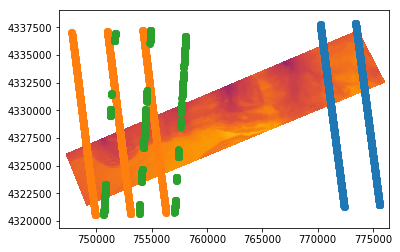

In [24]:
# seems to have removed some IceSAT2 lines that are in Profiling_struggle.ipynb
import matplotlib.pyplot as plt 
fig,ax = plt.subplots()
im = ax.imshow(dem,cmap='inferno',extent=[xmin,xmax,ymin,ymax])
#ATL06_gdf_list[1].plot(ax=ax)
for gdf in ATL06_gdf_list:
    gdf.plot(ax=ax)

In [32]:
# now compare for the strong beam
df1,df2,df3,df4,df5,df6 = [x for x_,x in ATL06_gdf_list[1].groupby(ATL06_gdf_list[1]['p_b'])] #pick 1 ATL06 and seperate it into 6 

In [33]:
df_list = [df1,df2,df3,df4,df5,df6]

-0.9194627241654829 0.6987052362508022 -0.0671205683748955
-0.9119609485973011 0.6592338585820772 -0.0665674416095431
-1.4446485332414216 1.140601616810156 -0.12131627958124315
-1.5511980528160647 1.5917283163378781 -0.13056863110205497
-1.213181115630874 0.6858006777648789 -0.09344191003130926
-1.0161917550223214 0.633591331704313 -0.07845673881486749


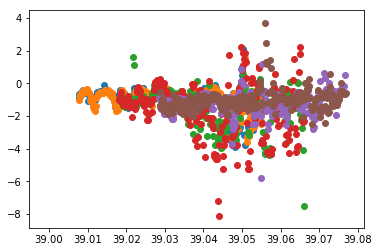

In [57]:
df_test = gda_lib.buffer_sampler(ds,df_list[5],20,ret_gdf=True)
df_test['snow_on_off'] = df_test['h_li']-df_test['med']
df_test
fig,ax = plt.subplots()
for gdf in df_list:
    df_test = gda_lib.buffer_sampler(ds,gdf,20,ret_gdf=True)
    df_test['snow_on_off'] = df_test['h_li']-df_test['med']
    ax.scatter(df_test['latitude'],df_test['snow_on_off'])
    print(df_test['snow_on_off'].mean(),df_test['snow_on_off'].std(),100*df_test['snow_on_off'].mean()/(df_test['h_li'].max()-df_test['h_li'].min()))
#df_test['snow_on_off'].hist(bins=30)
#ax.scatter(df_test['latitude'],df_test['snow_on_off'])

(3005, 3270)

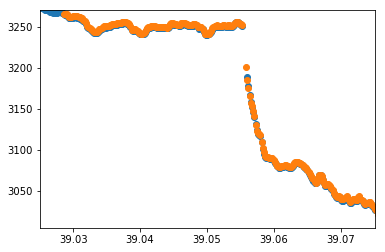

In [65]:
fig,ax = plt.subplots()
ax.scatter(df_test['latitude'],df_test['h_li'])
ax.scatter(df_test['latitude'],df_test['med'])
ax.set_xlim(39.025,39.075)
ax.set_ylim(3005,3270)


In [54]:
#%matplotlib notebook
#import matplotlib.pyplot as plt
#fig2,ax2 = plt.subplots()
#im = ax.imshow(dem,cmap='inferno',extent=[xmin,xmax,ymin,ymax])
#plt.colorbar(im,label='HAE (m WGS84)')
#for gdf in ATL06_gdf_list:
#    gdf.plot(ax=ax)
#ATL06_gdf.plot(ax=ax)

In [55]:
#plt.subplots()

In [56]:
#pwd